In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
os.listdir();

In [5]:
alcohol_nz_2022 = pd.read_csv("./alcohol-available-for-consumption-year-ended-december-2022.csv")

In [9]:
alcohol_nz_2022.isna().sum(axis = 0)

Unnamed: 0              0
Unnamed: 1              0
Series_reference        0
Period                  0
Data_value              5
STATUS                  0
UNITS                   0
MAGNTUDE                0
Subject                 0
Group                   0
Series_title_1          0
Series_title_2      13565
Series_title_3      13565
Series_title_4      13565
Series_title_5      13565
dtype: int64

In [11]:
alcohol_nz_2022.drop(["Series_title_2", "Series_title_3", "Series_title_4", "Series_title_5"], axis = 1, inplace = True)

In [15]:
alcohol_nz_2022.isna().sum(axis = 0)

Unnamed: 0          0
Unnamed: 1          0
Series_reference    0
Period              0
Data_value          5
STATUS              0
UNITS               0
MAGNTUDE            0
Subject             0
Group               0
Series_title_1      0
dtype: int64

In [17]:
alcohol_nz_2022

,Unnamed: 0,Unnamed: 1,Series_reference,Period,Data_value,STATUS,UNITS,MAGNTUDE,Subject,Group,Series_title_1
0,1935,Dec,ALCA.S1,1935.12,51.100000,FINAL,Litres,6,Alcohol Available for Consumption - ALC,(DISC) Volume & Volume Per Head,Beer
1,1936,Dec,ALCA.S1,1936.12,58.700000,FINAL,Litres,6,Alcohol Available for Consumption - ALC,(DISC) Volume & Volume Per Head,Beer
2,1937,Dec,ALCA.S1,1937.12,68.700000,FINAL,Litres,6,Alcohol Available for Consumption - ALC,(DISC) Volume & Volume Per Head,Beer
3,1938,Dec,ALCA.S1,1938.12,78.100000,FINAL,Litres,6,Alcohol Available for Consumption - ALC,(DISC) Volume & Volume Per Head,Beer
4,1939,Dec,ALCA.S1,1939.12,79.200000,FINAL,Litres,6,Alcohol Available for Consumption - ALC,(DISC) Volume & Volume Per Head,Beer
...,...,...,...,...,...,...,...,...,...,...,...
13560,2021,Dec,ALCQ.SAZZ,2021.12,156.231872,FINAL,Litres,6,Alcohol Available for Consumption - ALC,Litres of Beverage,Total all beverages
13561,2022,Mar,ALCQ.SAZZ,2022.03,114.485861,FINAL,Litres,6,Alcohol Available for Consumption - ALC,Litres of Beverage,Total all beverages
13562,2022,Jun,ALCQ.SAZZ,2022.06,110.033064,FINAL,Litres,6,Alcohol Available for Consumption - ALC,Litres of Beverage,Total all beverages
13563,2022,Sep,ALCQ.SAZZ,2022.09,121.087105,FINAL,Litres,6,Alcohol Available for Consumption - ALC,Litres of Beverage,Total all beverages


In [20]:
alcohol_nz_2022.Series_title_1.unique()

array(['Beer', 'Wine', 'Spirits', 'Beer Per Head', 'Wine Per Head',
       'Spirits Per Head', 'Beer containing not more than 1.150% alcohol',
       'Beer containing between 1.151% and 2.500% alc',
       'Beer containing between 2.501% and 4.350% alc',
       'Beer containing between 4.351% and 5.000% alc',
       'Beer containing more than 5.00% alcohol', 'Total beer',
       'Total spirits (proof litres)',
       'Spirits containing not more than 23% alcohol',
       'Spirits containing more than 23% alcohol', 'Total spirits',
       'Table wine (disc. Sept 1999)', 'Fortified wine (disc. Sept 1999)',
       'Total wine (disc. Sept 1999)',
       'Grape wine containing not more than 14% alc.',
       'Grape wine containing more than 14% alcohol',
       'Other wine containing not more than 14% alc.',
       'Other wine containing more than 14% alcohol',
       'Total wine containing not more than 14% alc.',
       'Total wine containing more than 14% alcohol', 'Total wine',
       '

In [23]:
beer = alcohol_nz_2022.loc[alcohol_nz_2022.Series_title_1 == "Beer", :]

In [26]:
beer.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Series_reference', 'Period', 'Data_value',
       'STATUS', 'UNITS', 'MAGNTUDE', 'Subject', 'Group', 'Series_title_1'],
      dtype='object')

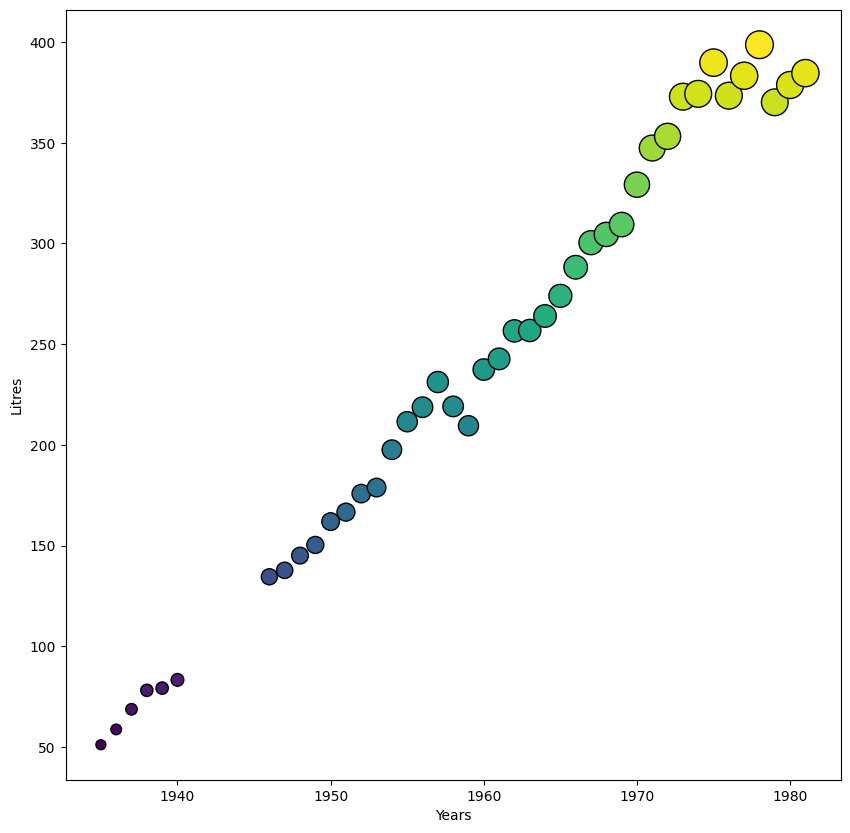

In [35]:
fig, axes = plt.subplots()
fig.set_size_inches(10, 10)

axes.scatter(beer.loc[:, "Unnamed: 0"], beer.loc[:, "Data_value"], s = beer.loc[:, "Data_value"], c = beer.loc[:, "Data_value"], edgecolor = "black")
axes.set_xlabel("Years")
axes.set_ylabel("Litres")
plt.show()

In [38]:
alcohol_nz_2022.groupby("Series_title_1").apply(lambda gp: gp.shape)

Series_title_1
Beer                                                                                         (47, 11)
Beer Per Head                                                                                (47, 11)
Beer containing between 1.151% and 2.500% alc                                               (362, 11)
Beer containing between 2.501% and 4.350% alc                                               (362, 11)
Beer containing between 4.351% and 5.000% alc                                               (362, 11)
Beer containing more than 5.00% alcohol                                                     (362, 11)
Beer containing not more than 1.150% alcohol                                                (362, 11)
Fortified wine (disc. Sept 1999)                                                            (254, 11)
Grape wine containing more than 14% alcohol                                                 (478, 11)
Grape wine containing not more than 14% alc.                       

In [40]:
nz_immig = pd.read_csv("./international-migration-september-2023-citizenship-by-visa-by-country-of-last-permanent-residence.csv")

In [42]:
nz_immig.columns

Index(['year_month', 'month_of_release', 'passenger_type', 'direction',
       'citizenship', 'visa', 'country_of_residence', 'estimate',
       'standard_error', 'status'],
      dtype='object')

In [43]:
nz_immig.country_of_residence.unique()

array(['Afghanistan', 'Africa and the Middle East', 'Albania', 'Algeria',
       'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Indian Ocean Territory',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Chad', 'Chile', "China, People's Republic of", 'Christmas Island',
       'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo',
       'Congo, the Democratic Republic of the', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic (to Sep 2018), Czechia (from Oct 2018)',
       'Czechoslovakia', 'Denmark', 'Djibouti

In [62]:
np.unique(nz_immig.country_of_residence, return_counts = True)

(array(['Afghanistan', 'Africa and the Middle East', 'Albania', 'Algeria',
        'Andorra', 'Angola', 'Anguilla', 'Antarctica',
        'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
        'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
        'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
        'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
        'Botswana', 'Brazil', 'British Indian Ocean Territory',
        'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
        'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
        'Central African Republic', 'Chad', 'Chile',
        "China, People's Republic of", 'Christmas Island',
        'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo',
        'Congo, the Democratic Republic of the', 'Cook Islands',
        'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
        'Cyprus', 'Czech Republic (to Sep 2018), Czechia (from Oct 201

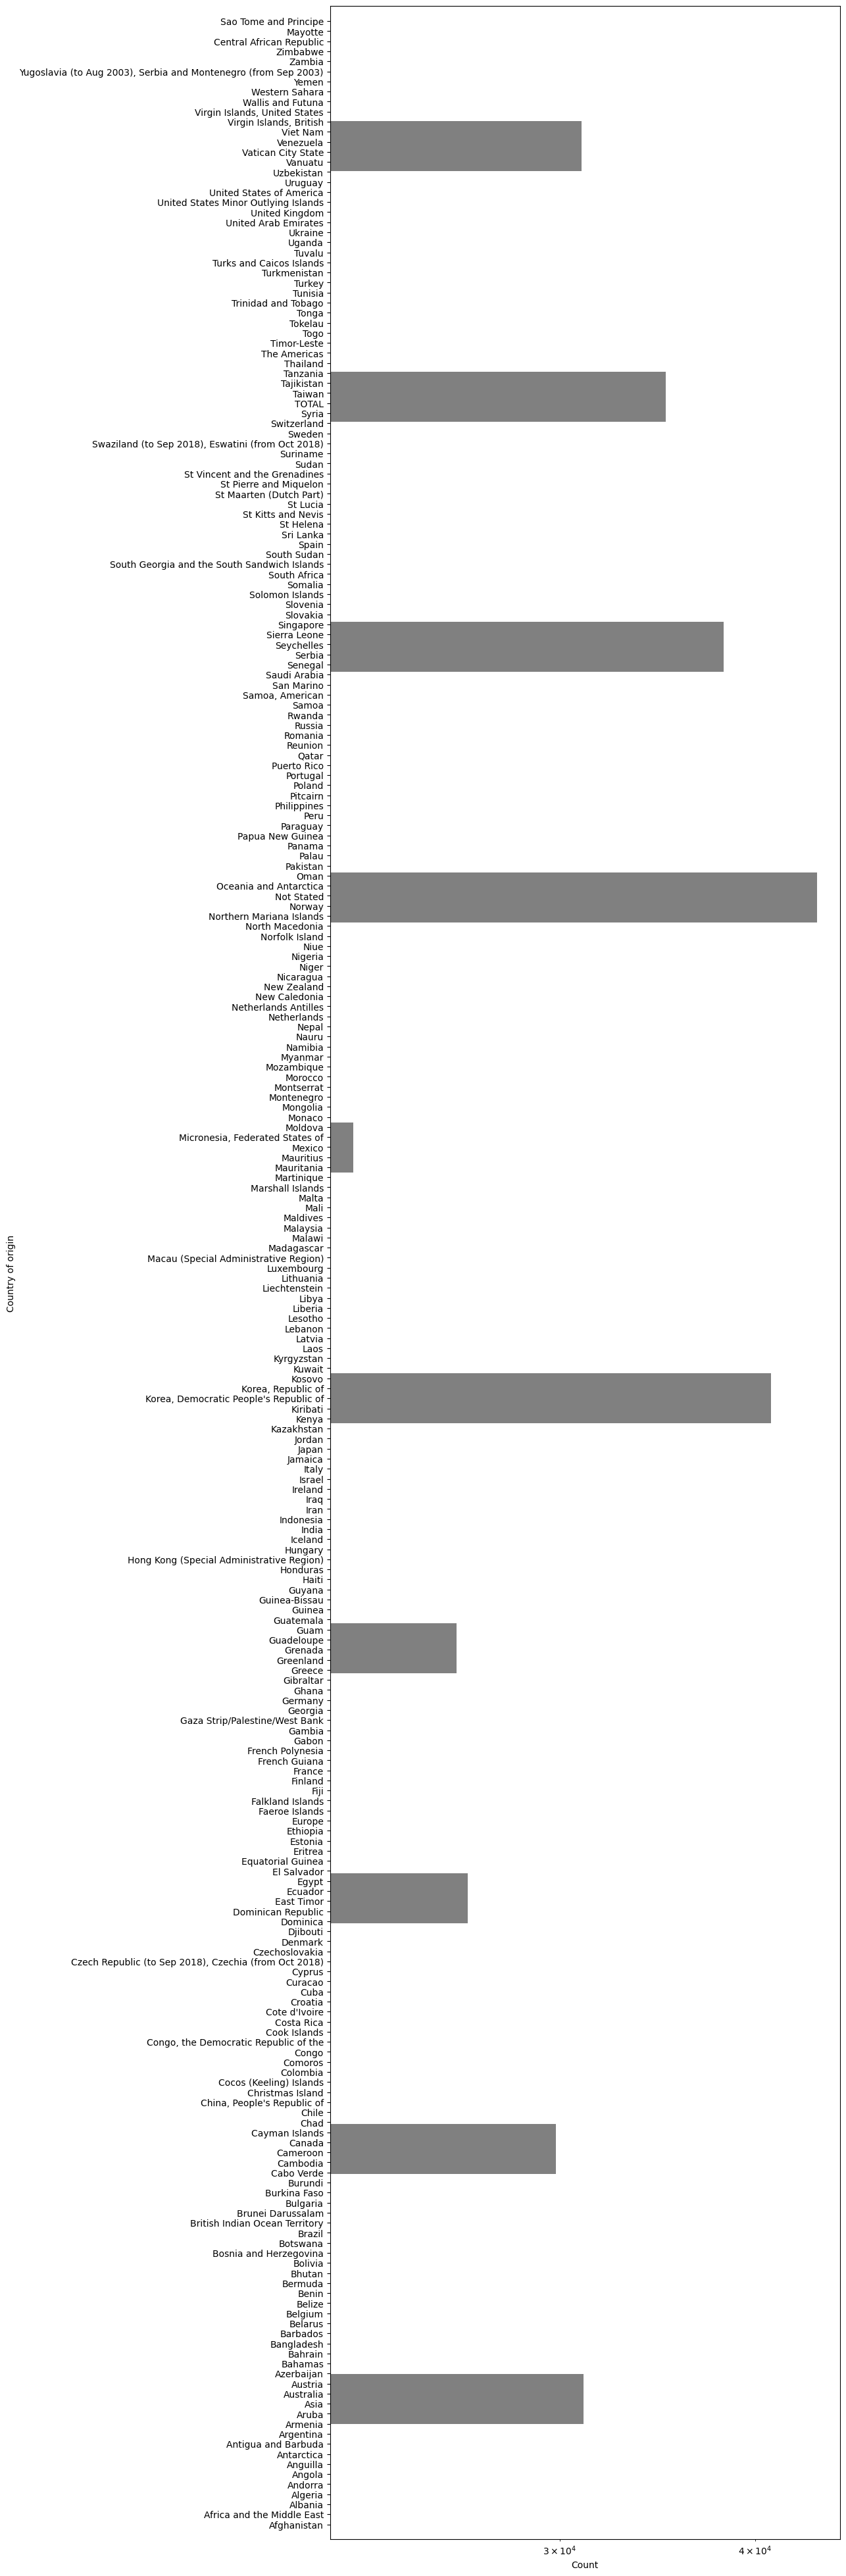

In [85]:
fig, axes = plt.subplots()
fig.set_size_inches(10, 50)

axes.hist(nz_immig.country_of_residence, rwidth = 0.2, color = "grey", orientation = "horizontal")
axes.grid(axis = "x")
axes.set_axisbelow(True)
# for ytlab in axes.get_yticklabels():
#   ytlab.set_rotation(90)

# apply(lambda xtlab: xtlab.set_rotation(90), axes.get_xticklabels())
# won't work because with map() we need to capture the output and use it.
# in-place modifications seem not to be supported

axes.set_xscale("log")
axes.set_ylabel("Country of origin")
axes.set_xlabel("Count")
plt.show()

In [64]:
[(x, y) for (x, y, _) in axes.get_xticklabels()

TypeError: cannot unpack non-iterable Text object

In [68]:
dir(axes.get_xticklabels()[0])

['_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_animated',
 '_antialiased',
 '_axes',
 '_bbox_patch',
 '_callbacks',
 '_char_index_at',
 '_charsize_cache',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_color',
 '_different_canvas',
 '_fontproperties',
 '_fully_clipped_to_axes',
 '_get_dist_to_box',
 '_get_layout',
 '_get_multialignment',
 '_get_rendered_text_width',
 '_get_wrap_line_width',
 '_get_wrapped_text',
 '_get_xy_display',
 '_gid',
 '_horizontalalignment',
 '_in_layout',
 '_internal_update',
 '_label',
 '_linespacing',
 '_mouseover',
 '_multialignment',
 '_parse_math',
 '

In [69]:
axes.get_xticklabels()[0]._label

''

In [95]:
nz_immig.country_of_residence.value_counts()

country_of_residence
TOTAL                                           4128
Asia                                            4124
Europe                                          4122
The Americas                                    4121
Oceania and Antarctica                          4110
                                                ... 
South Georgia and the South Sandwich Islands      12
Mayotte                                           10
Guinea-Bissau                                      8
Central African Republic                           8
Sao Tome and Principe                              4
Name: count, Length: 250, dtype: int64

MemoryError: 

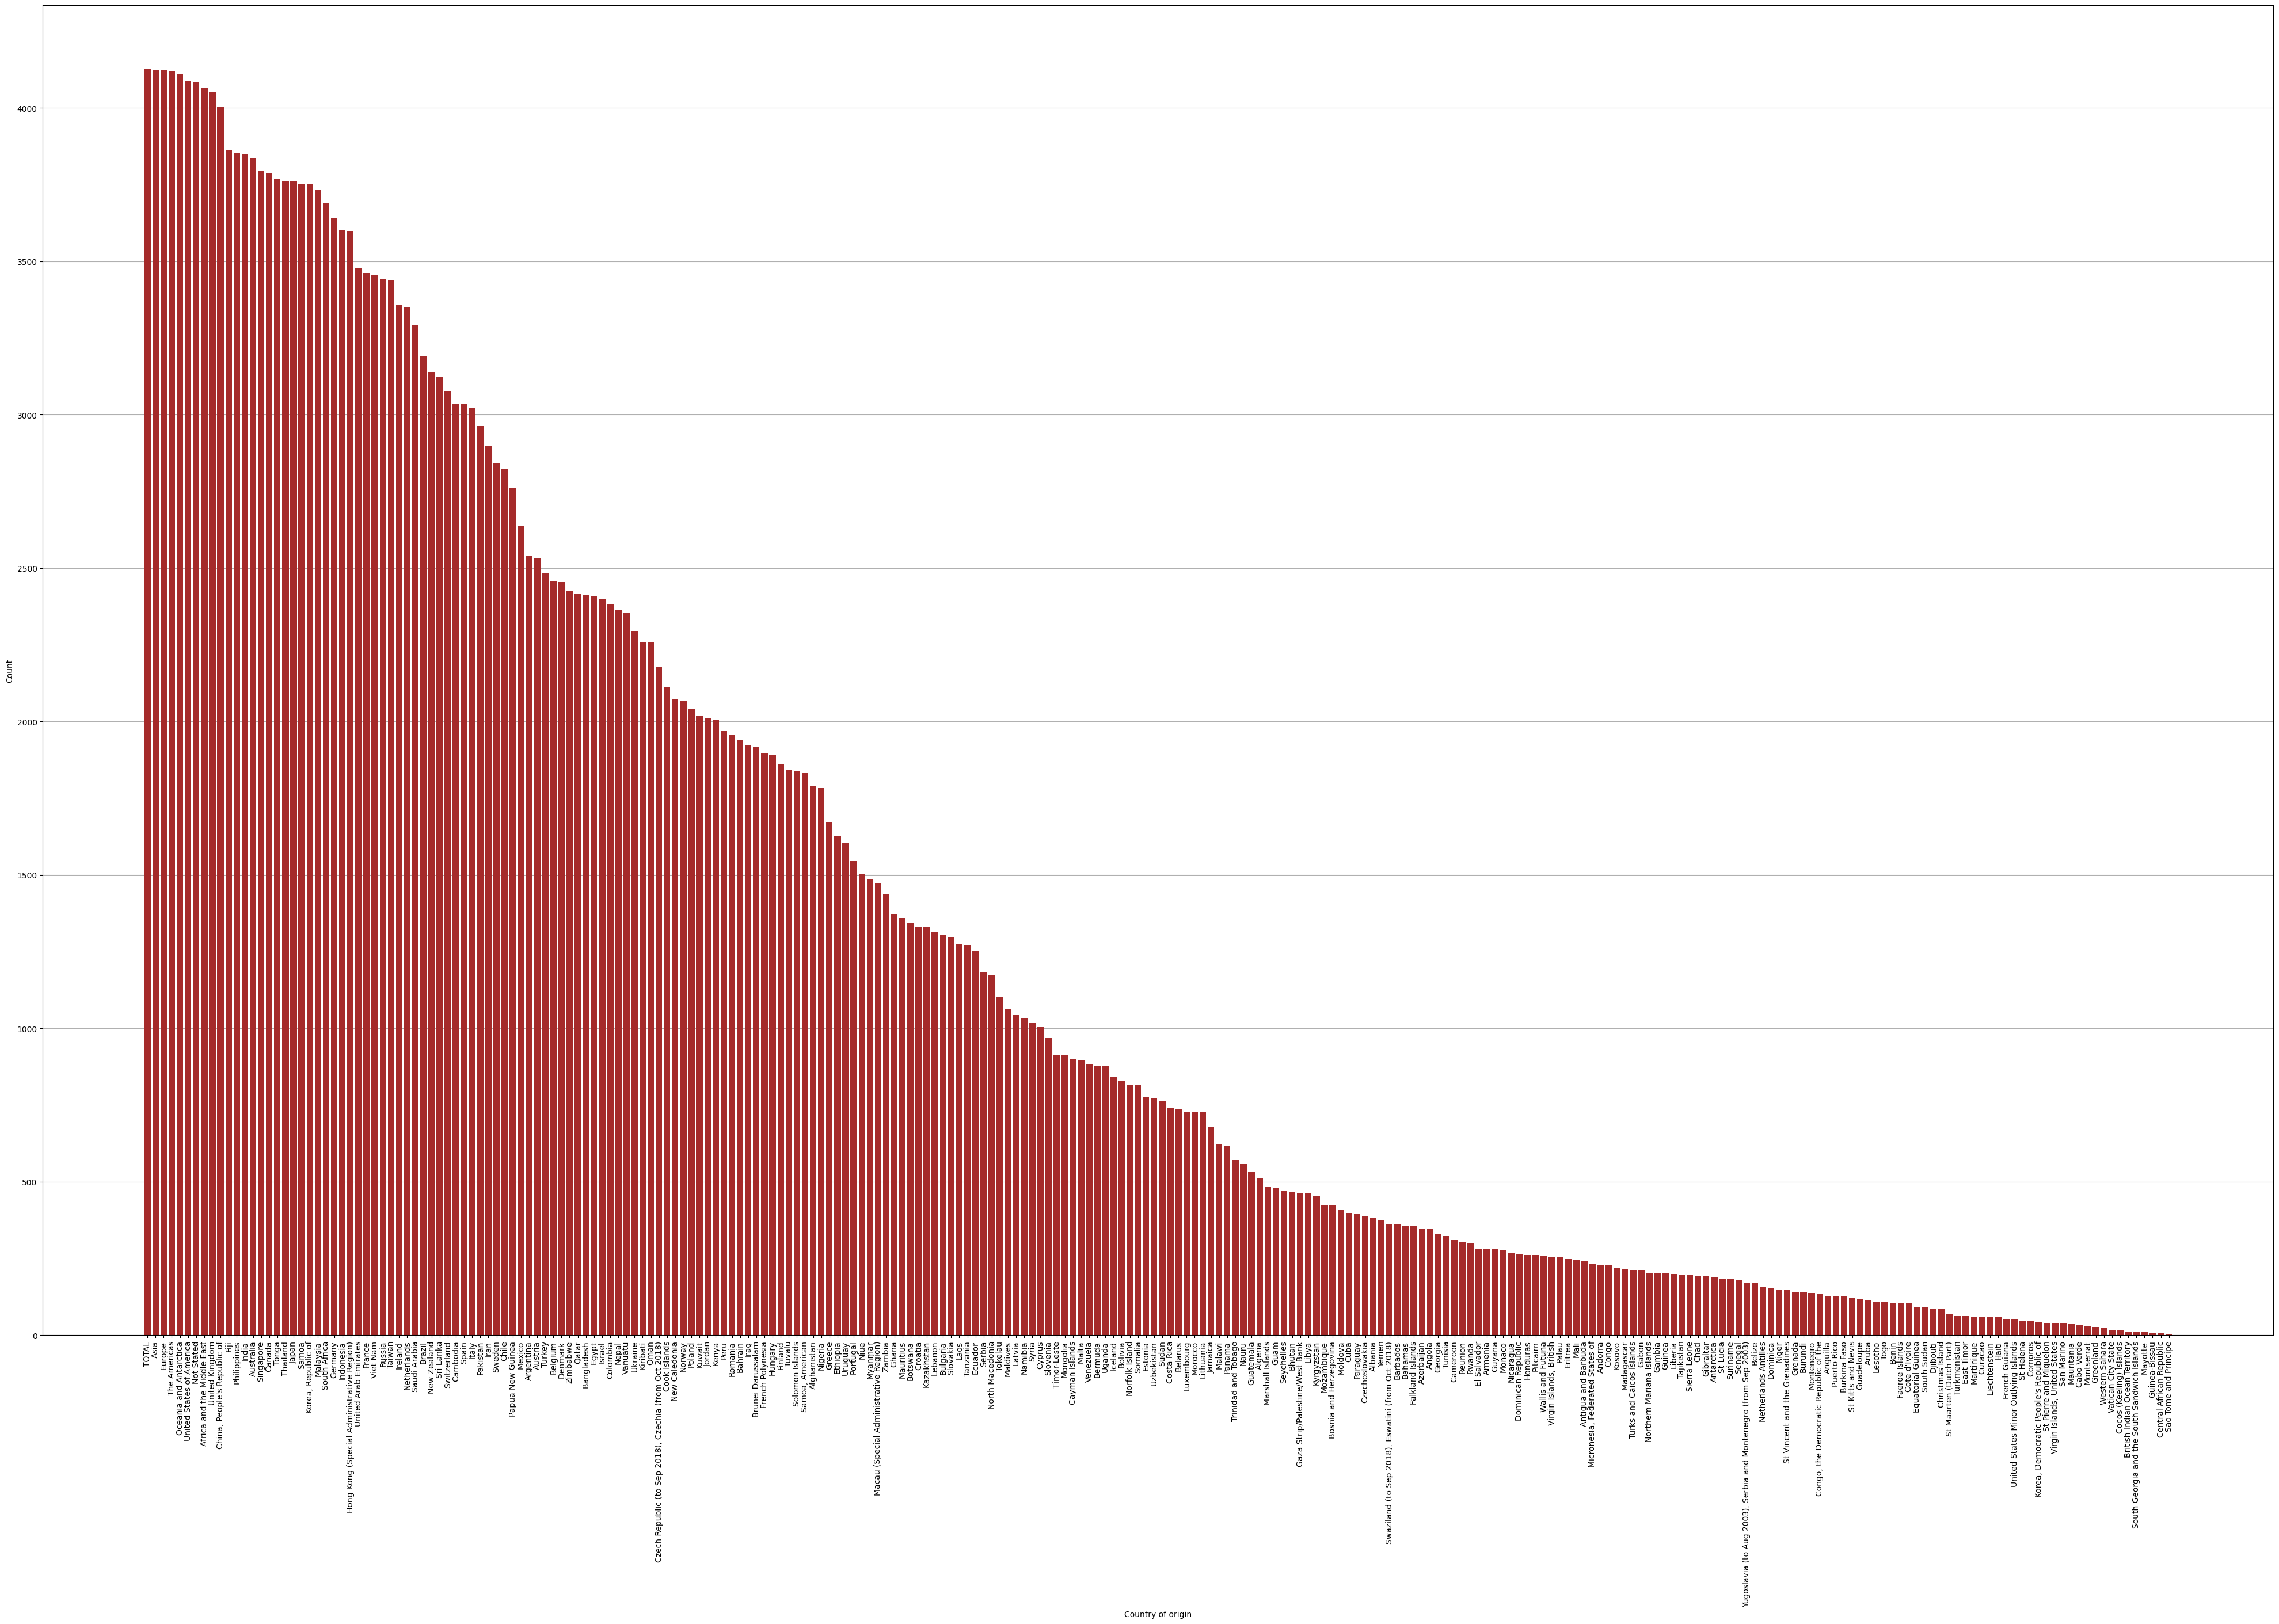

In [123]:
fig, axes = plt.subplots()
fig.set_size_inches(50, 30)

axes.bar(nz_immig.country_of_residence.value_counts().index, nz_immig.country_of_residence.value_counts().values, color = "brown")
for xtlab in axes.get_xticklabels():
    xtlab.set_rotation(90)
axes.grid(axis = "y")
axes.set_axisbelow(True)
axes.set_xlabel("Country of origin")
axes.set_ylabel("Count")
# plt.show()
plt.savefig("./nz_immigrants.jpeg", format = "jpg", dpi = 1000)

In [114]:
import gc

In [122]:
gc.collect(2)

0